# GRIP - THE SPARKS FOUNDATION


### By - Purushottam Kumar


## TASK 2 - Prediction using Unsupervised ML


 From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.


### Step 1 - Import all libraries

In [1]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')
import warnings
warnings.filterwarnings("ignore")

#scaling
from sklearn.preprocessing import StandardScaler

#hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

#K-means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Step 2 : Reading and Understanding Data

In [2]:
# Load the data-set
df = pd.read_csv('C:\\Users\ASUS\Downloads\Iris - Iris.csv')

df.head()    

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#number of rows & columns in the data
df.shape

(150, 6)

In [4]:
#Data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#Summary of numerical columns
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#Summary of numerical and Categorical columns
df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [7]:
# Sanity Check 
# To check whetherthe dataset is biased or not

df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

#### Check for Null values in the data

In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is no missing value in the data

#### Check for skewness in the data

In [9]:
df.skew()

Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

The skewness of the data is in tolerable limits.

#### Check for duplicate rows

In [10]:
sum(df.duplicated(subset = 'Id'))

0

#### Dropping unnecessary column

There is no duplicate rows in the data. So we can drop "Id" column.
As they won't be having any role in further analysis.

In [11]:
df.drop('Id',axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Step 3 : Exploratory Data Analysis

#### 1. Univariate Analysis

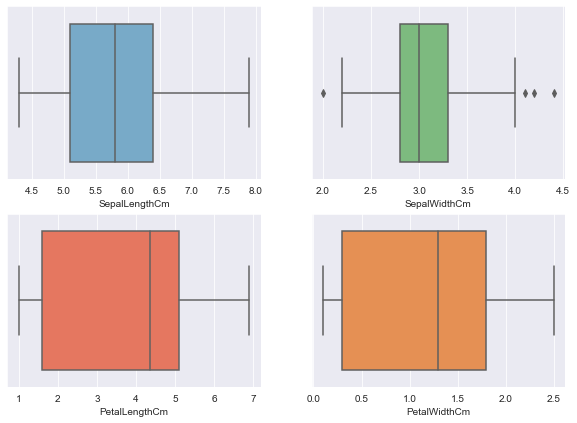

In [12]:
#Distribution of each column
fig, axs = plt.subplots(2,2, figsize = (10,7))
plt1 = sns.boxplot(df['SepalLengthCm'], ax = axs[0,0], palette="Blues")
plt2 = sns.boxplot(df['SepalWidthCm'], ax = axs[0,1], palette="Greens")
plt3 = sns.boxplot(df['PetalLengthCm'], ax = axs[1,0], palette="Reds")
plt4 = sns.boxplot(df['PetalWidthCm'], ax = axs[1,1], palette="Oranges")
plt.show()

There are some outliers in the column 'SepalWidthCm'. 
As there values are not very far from the whiskers, so we are going to cap these values for less than 5% to values equal to 5% and values more than 95% to values equal to 95%.

In [13]:
#Caluclating the quartiles of SepalWidthCm and capping the outliers.
Q1 = df.SepalWidthCm.quantile(0.05)
Q4 = df.SepalWidthCm.quantile(0.95)

df[(df.SepalWidthCm > Q4)]


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
5,5.4,3.9,1.7,0.4,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa


In [14]:
#After removing the outlier
df = df[(df.SepalWidthCm <= Q4) & (df.SepalWidthCm >= Q1)]
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Figure size 720x1080 with 0 Axes>

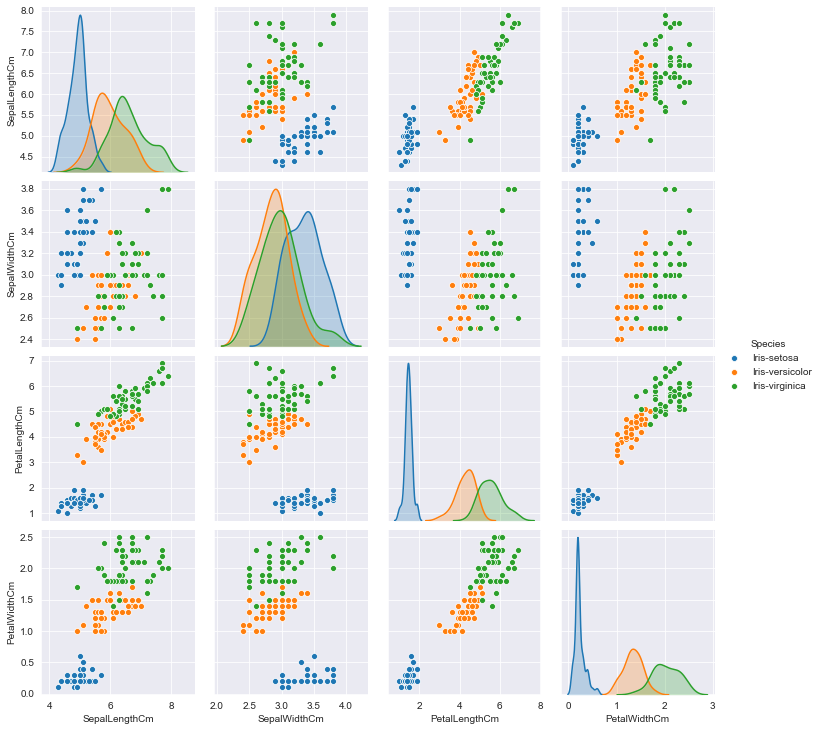

In [15]:
# Pair plot among the numerical variables
fig = plt.figure(figsize=(10,15))
sns.pairplot(df,diag_kind='kde',hue='Species')
plt.show()

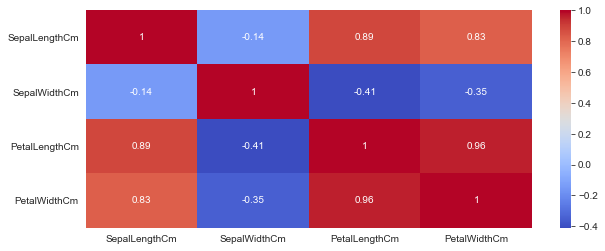

In [16]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (10, 4))
sns.heatmap(df.corr(), annot = True, cmap="coolwarm")
plt.show()

There is high correlation exist between Petal width & Sepal length, Petal width & Petal length, Petal length & Sepal length.

### STEP 4 : Data preparation

### Scaling

It is important step in data preprocessing. Scaling the numerical variables helps to equal weight them for comparsion. There are two common ways of scaling.

1. Min-Max Scaling
2. Standardization

In [17]:
# Selected Standardization for the scaling technique as the resultant distribution has a standard deviation around with mean=0.
# Import the StandardScaler()
features = df.columns
scaler = StandardScaler()
df_scaled= scaler.fit_transform(df.drop('Species',axis=1))
df1=pd.DataFrame(df_scaled)
df1.head()

,0,1,2,3
0,-0.915993,1.294878,-1.399382,-1.359196
1,-1.152378,-0.167775,-1.399382,-1.359196
2,-1.388763,0.417286,-1.456227,-1.359196
3,-1.506956,0.124756,-1.342537,-1.359196
4,-1.034185,1.587409,-1.399382,-1.359196


In [18]:
# data after scaling :

df1.columns = features[1:]
df1.head()

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.915993,1.294878,-1.399382,-1.359196
1,-1.152378,-0.167775,-1.399382,-1.359196
2,-1.388763,0.417286,-1.456227,-1.359196
3,-1.506956,0.124756,-1.342537,-1.359196
4,-1.034185,1.587409,-1.399382,-1.359196


### Hopkins Statistics

Before applying any clustering algorithm to the given data set, it is important to check whether the given data has some meaningful clusters or not. To check this, we use Hopkins Statistics.

In [19]:
#hopkins statistics

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
    return H

In [20]:
# the value is evalued on the scale of 0 to 1.

hopkins(df.drop('Species', axis = 1))

0.8740767330091184

We have got the Hopkins statistics score close to 1 which indicate the data has higher tendency to be used for clustering.

### Step 5 : Perform Clustering

#### To find the optimum number of clusters for K Means.

There are two methods to find :

1. Elbow Curve Method/SSD
2. Silhouette Analysis

#### (a) Elbow Curve :

The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

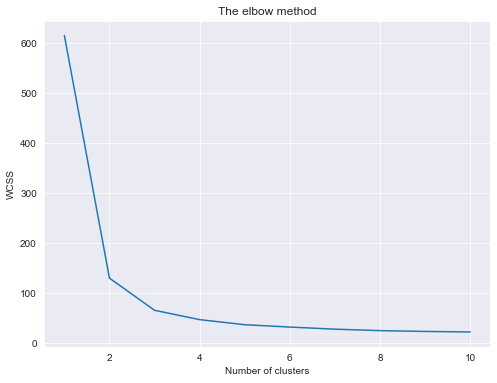

In [21]:
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 500, n_init = 10, random_state = 100)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

##### From this we choose the number of clusters as "3".

#### (b) Silhouette Score/Analysis :

The value ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. The distance metric used is Euclidean distance.

In [22]:
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters,max_iter=500)
    kmeans.fit(df1)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df1,cluster_labels)
    print("For n_clusters={0},the silhouette score is {1}".format(num_clusters,silhouette_avg))

For n_clusters=2,the silhouette score is 0.5890975170818434
For n_clusters=3,the silhouette score is 0.47077315432639844
For n_clusters=4,the silhouette score is 0.4174733707790466
For n_clusters=5,the silhouette score is 0.349179743621735
For n_clusters=6,the silhouette score is 0.3588290016886895
For n_clusters=7,the silhouette score is 0.37939850746988457
For n_clusters=8,the silhouette score is 0.38214248398637524


### KMeans Clustering with k = 3

In [23]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 500, n_init = 10, random_state = 100)
df1_kmeans = kmeans.fit(x)

In [24]:
df1_kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 2])

In [25]:
#Finding and adding the labels to the dataset
labels_kmeans = pd.Series(df1_kmeans.labels_, index=df.index)
df1_kmeans = df.copy()
df1_kmeans['Cluster_ID'] = labels_kmeans
df1_kmeans.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster_ID
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


In [26]:
# Checking the number of species assigned to each clusters
df1_kmeans['Cluster_ID'].value_counts()

2    55
1    43
0    38
Name: Cluster_ID, dtype: int64

In [27]:
#Mean value of each category of species in each cluster group
sepal_len = pd.DataFrame(df1_kmeans.groupby(["Cluster_ID"]).SepalLengthCm.mean())
sepal_wid = pd.DataFrame(df1_kmeans.groupby(["Cluster_ID"]).SepalWidthCm.mean())
petal_len = pd.DataFrame(df1_kmeans.groupby(["Cluster_ID"]).PetalLengthCm.mean())
petal_wid = pd.DataFrame(df1_kmeans.groupby(["Cluster_ID"]).PetalWidthCm.mean())

In [28]:
cluster_analysis_df = pd.concat([pd.Series([0,1,2]),sepal_len,sepal_wid,petal_len,petal_wid], axis=1)

In [29]:
#Rename the columns
cluster_analysis_df.columns = ["Cluster_ID","clusters_sepal_len","clusters_sepal_wid","clusters_petal_len","clusters_petal_wid"]
cluster_analysis_df

,Cluster_ID,clusters_sepal_len,clusters_sepal_wid,clusters_petal_len,clusters_petal_wid
0,0,6.850000,3.073684,5.742105,2.071053
1,1,4.948837,3.351163,1.472093,0.237209
2,2,5.925455,2.816364,4.430909,1.460000


### Category of Species in each Cluster

In [34]:
#Cluster '0'
df[df1_kmeans['Cluster_ID']==0].head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
52,6.9,3.1,4.9,1.5,Iris-versicolor
77,6.7,3.0,5.0,1.7,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica


In [35]:
#Cluster '1'
df[df1_kmeans['Cluster_ID']==1].head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa


In [36]:
#Cluster '2'
df[df1_kmeans['Cluster_ID']==2].head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
57,4.9,2.4,3.3,1.0,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor
61,5.9,3.0,4.2,1.5,Iris-versicolor
63,6.1,2.9,4.7,1.4,Iris-versicolor
